In [ ]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import (
    confusion_matrix,
)
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

# Neural Network Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# SHAP for feature importance analysis
import shap

# Ignore warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(
    "/Users/akash/Documents/Semester 4/ML-2/Assignemnt/Taxi-cancellation-case.csv"
)
df.head()

,row#,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,1,17712,12,NaN,2,1021.0,1323.0,NaN,NaN,41275.94,NaN,0,0,41275.33403,13.028530,77.54625,12.869805,77.653211,0
1,2,17037,12,NaN,2,455.0,1330.0,NaN,NaN,41275.53,NaN,0,0,41275.41597,12.999874,77.67812,12.953434,77.706510,0
2,3,761,12,NaN,2,814.0,393.0,NaN,NaN,41276.02,41277.0,1,0,41275.50972,12.908993,77.68890,13.199560,77.706880,0
3,4,868,12,NaN,2,297.0,212.0,NaN,NaN,41275.55,NaN,0,0,41275.52917,12.997890,77.61488,12.994740,77.607970,0
4,5,21716,28,NaN,2,1237.0,330.0,NaN,NaN,41275.69,NaN,0,0,41275.62986,12.926450,77.61206,12.858833,77.589127,0


In [4]:
# Check the number of rows and columns
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Display column names
print("\nColumn Names:")
print(df.columns)

# Display basic info about dataset
print("\nDataset Information:")
df.info()


Dataset contains 10000 rows and 19 columns.

Column Names:
Index(['row#', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   row#                 10000 non-null  int64  
 1   user_id              10000 non-null  int64  
 2   vehicle_model_id     10000 non-null  int64  
 3   package_id           1752 non-null   float64
 4   travel_type_id       10000 non-null  int64  
 5   from_area_id         9985 non-null   float64
 6   to_area_id           7909 non-null   float64
 7   from_city_id         370

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])



Missing Values in Each Column:
package_id      8248
from_area_id      15
to_area_id      2091
from_city_id    6294
to_city_id      9661
to_date         4178
from_lat          15
from_long         15
to_lat          2091
to_long         2091
dtype: int64


In [6]:
# Summary statistics for numerical features
print("\nSummary Statistics:")
df.describe()



Summary Statistics:


,row#,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,10000.00000,10000.000000,10000.000000,1752.000000,10000.000000,9985.000000,7909.000000,3706.000000,339.000000,10000.000000,5822.000000,10000.000000,10000.00000,10000.000000,9985.000000,9985.000000,7909.000000,7909.000000,10000.000000
mean,5000.50000,30663.966200,26.191700,1.988014,2.141300,709.767752,665.457833,14.898003,68.318584,41454.670432,41507.845758,0.353300,0.04240,41453.181196,12.983301,77.636423,13.026217,77.640752,0.074300
std,2886.89568,10988.599834,27.228053,1.401791,0.434917,418.968918,400.628562,1.190770,49.886427,89.998022,301.631112,0.478019,0.20151,89.369941,0.085659,0.058667,0.113633,0.063522,0.262272
min,1.00000,16.000000,1.000000,1.000000,1.000000,2.000000,6.000000,1.000000,4.000000,41275.150000,25569.291670,0.000000,0.00000,41275.130560,12.776630,77.386930,12.776630,77.386930,0.000000
25%,2500.75000,24410.750000,12.000000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,41386.830000,41480.137740,0.000000,0.00000,41386.011457,12.927320,77.594800,12.951850,77.587527,0.000000
50%,5000.50000,31510.000000,12.000000,2.000000,2.000000,590.000000,516.000000,15.000000,49.000000,41463.170000,41516.840625,0.000000,0.00000,41461.494445,12.969368,77.635750,12.982750,77.645030,0.000000
75%,7500.25000,39094.500000,24.000000,2.000000,2.000000,1086.000000,1052.000000,15.000000,108.000000,41527.772500,41559.713010,1.000000,0.00000,41525.401560,13.006450,77.687790,13.199560,77.706880,0.000000
max,10000.00000,48729.000000,91.000000,7.000000,3.000000,1401.000000,1403.000000,15.000000,203.000000,41623.190000,41623.241150,1.000000,1.00000,41602.607640,13.366072,77.786420,13.366072,77.786420,1.000000


# Exploratory Data Analysis (EDA)

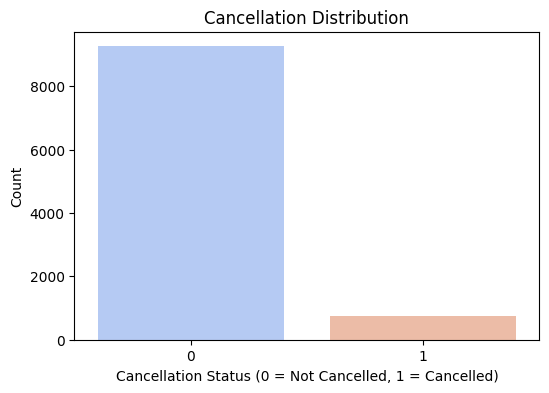

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Car_Cancellation", data=df, palette="coolwarm")
plt.title("Cancellation Distribution")
plt.xlabel("Cancellation Status (0 = Not Cancelled, 1 = Cancelled)")
plt.ylabel("Count")
plt.show()


In [8]:
# Display percentage of cancelled vs. non-cancelled bookings
cancellation_rate = df["Car_Cancellation"].value_counts(normalize=True) * 100
print("\nCancellation Rate (%):")
print(cancellation_rate)


Cancellation Rate (%):
Car_Cancellation
0    92.57
1     7.43
Name: proportion, dtype: float64


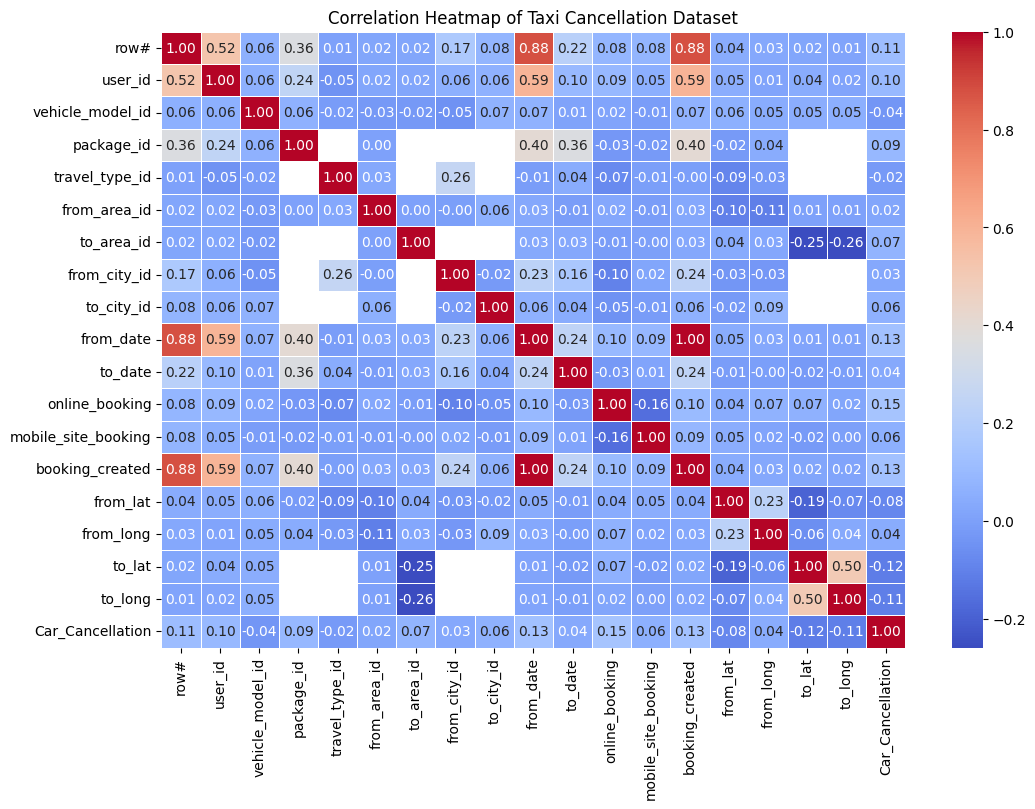

In [ ]:
# Computing the correlation matrix before cleaning
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Taxi Cancellation Dataset")
plt.show()

# Data Cleaning 

In [ ]:
# Identify columns with more than 80% missing values
columns_to_drop = [
    "package_id",
    "from_city_id",
    "to_city_id",
    "to_area_id",
    "from_area_id",
    "row#",
    "user_id",
    "vehicle_model_id",
]

# Drop the identified columns
df_cleaned = df.drop(columns=columns_to_drop)

# Display the remaining columns
print("Remaining columns after dropping high-missing-value columns:")
print(df_cleaned.columns.tolist())


Remaining columns after dropping high-missing-value columns:
['travel_type_id', 'from_date', 'to_date', 'online_booking', 'mobile_site_booking', 'booking_created', 'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation']


In [ ]:
# Fill missing values in GPS columns with the median values
gps_columns = ["from_lat", "from_long", "to_lat", "to_long"]
for col in gps_columns:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Display missing values after imputation
print("\nMissing Values After Imputation:")
print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])



Missing Values After Imputation:
to_date    4178
dtype: int64


In [ ]:
# Converting numeric date columns to datetime format (Before computing trip duration)
df_cleaned["from_date"] = pd.to_datetime(
    df_cleaned["from_date"], origin="1899-12-30", unit="D"
)
df_cleaned["to_date"] = pd.to_datetime(
    df_cleaned["to_date"], origin="1899-12-30", unit="D"
)
df_cleaned["booking_created"] = pd.to_datetime(
    df_cleaned["booking_created"], origin="1899-12-30", unit="D"
)

# Fixing Missing 'to_date' Values
df_cleaned.loc[df_cleaned["Car_Cancellation"] == 1, "to_date"] = df_cleaned[
    "from_date"
]  # Canceled rides
median_trip_duration = (
    df_cleaned[df_cleaned["Car_Cancellation"] == 0]["to_date"] - df_cleaned["from_date"]
).median()
df_cleaned.loc[df_cleaned["to_date"].isnull(), "to_date"] = (
    df_cleaned["from_date"] + median_trip_duration
)

# Computeing trip duration (Convert to hours)
df_cleaned["trip_duration"] = (
    df_cleaned["to_date"] - df_cleaned["from_date"]
).dt.total_seconds() / 3600

# Fixing Missing 'trip_duration' Values
df_cleaned.loc[df_cleaned["Car_Cancellation"] == 1, "trip_duration"] = (
    0  # Canceled rides have 0 duration
)
df_cleaned["trip_duration"].fillna(
    median_trip_duration.total_seconds() / 3600, inplace=True
)


# Verifying if missing values are fixed
print("\nMissing Values After Fixing 'trip_duration' and 'to_date':")
print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])



Missing Values After Fixing 'trip_duration' and 'to_date':
Series([], dtype: int64)


In [74]:
print("Current Columns in Dataset:")
print(df_cleaned.columns.tolist())


Current Columns in Dataset:
['travel_type_id', 'from_date', 'to_date', 'online_booking', 'mobile_site_booking', 'booking_created', 'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation', 'trip_duration']


In [76]:
df_cleaned.head()

,travel_type_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,trip_duration
0,2,2013-01-01 22:33:36.000000198,2013-01-01 23:49:26.256000128,0,0,2013-01-01 08:01:00.191999844,13.028530,77.54625,12.869805,77.653211,0,1.26396
1,2,2013-01-01 12:43:11.999999896,2013-01-01 13:59:02.255999826,0,0,2013-01-01 09:58:59.808000155,12.999874,77.67812,12.953434,77.706510,0,1.26396
2,2,2013-01-02 00:28:47.999999723,2013-01-03 00:00:00.000000000,1,0,2013-01-01 12:13:59.808000155,12.908993,77.68890,13.199560,77.706880,0,23.52000
3,2,2013-01-01 13:12:00.000000250,2013-01-01 14:27:50.256000180,0,0,2013-01-01 12:42:00.288000138,12.997890,77.61488,12.994740,77.607970,0,1.26396
4,2,2013-01-01 16:33:36.000000198,2013-01-01 17:49:26.256000128,0,0,2013-01-01 15:06:59.904000077,12.926450,77.61206,12.858833,77.589127,0,1.26396


# Feature Engineering

In [ ]:
#  Extracting Useful Features from Timestamps
df_cleaned["from_day_of_week"] = df_cleaned[
    "from_date"
].dt.dayofweek  # Monday=0, Sunday=6 (day of the week)
df_cleaned["from_hour"] = df_cleaned[
    "from_date"
].dt.hour  # Extract hour of the day (time of the day)

#  Extracting Holiday Flag
holiday_list = [
    "2013-01-01",  # New Year's Day
    "2013-02-18",  # Family Day
    "2013-04-01",  # Easter Monday
    "2013-05-20",  # Victoria Day
    "2013-07-01",  # Canada Day
    "2013-09-02",  # Labour Day
    "2013-10-14",  # Thanksgiving Day
    "2013-11-11",  # Remembrance Day
    "2013-12-25",  # Christmas Day
    "2013-12-26",
]  # Boxing Day
df_cleaned["is_holiday"] = (
    df_cleaned["from_date"].astype(str).isin(holiday_list).astype(int)
)

# Reset index after row deletion
df_cleaned.reset_index(drop=True, inplace=True)


In [ ]:
# Encode categorical variables using One-Hot Encoding
categorical_cols = [
    "travel_type_id",
    "online_booking",
    "mobile_site_booking",
    "is_holiday",
]
df_encoded = pd.get_dummies(
    df_cleaned, columns=categorical_cols, drop_first=False
)  # Remove drop_first=True

# Display updated feature names to confirm encoding
print("Encoded Feature Names:")
print(df_encoded.columns)


Encoded Feature Names:
Index(['from_date', 'to_date', 'booking_created', 'from_lat', 'from_long',
       'to_lat', 'to_long', 'Car_Cancellation', 'trip_duration',
       'from_day_of_week', 'from_hour', 'travel_type_id_1', 'travel_type_id_2',
       'travel_type_id_3', 'online_booking_0', 'online_booking_1',
       'mobile_site_booking_0', 'mobile_site_booking_1', 'is_holiday_0'],
      dtype='object')


In [ ]:
# Defining numerical columns to scale
num_cols_to_scale = [
    "from_lat",
    "from_long",
    "to_lat",
    "to_long",
    "trip_duration",
    "from_hour",
]
scaler = StandardScaler()

df_encoded[num_cols_to_scale] = scaler.fit_transform(df_encoded[num_cols_to_scale])


print("\nSample of Scaled Numerical Data:")
print(df_encoded[num_cols_to_scale].head())



Sample of Scaled Numerical Data:
   from_lat  from_long    to_lat   to_long  trip_duration  from_hour
0  0.528672  -1.538256 -1.436116  0.204622       0.013994   1.649011
1  0.193876   0.711321 -0.620895  1.147724       0.013994   0.007600
2 -0.867911   0.895218  1.778359  1.154271       0.018142  -1.962093
3  0.170697  -0.367493 -0.218241 -0.595897       0.013994   0.171741
4 -0.663956  -0.415600 -1.543072 -0.929315       0.013994   0.664164


In [ ]:
# Drop unnecessary columns after feature extraction
columns_to_remove = ["from_date", "to_date", "booking_created"]
df_final = df_encoded.drop(columns=columns_to_remove)

# Confirm final dataset structure
print("\nFinal Columns in Dataset After Cleaning:")
print(df_final.columns.tolist())



Final Columns in Dataset After Cleaning:
['from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation', 'trip_duration', 'from_day_of_week', 'from_hour', 'travel_type_id_1', 'travel_type_id_2', 'travel_type_id_3', 'online_booking_0', 'online_booking_1', 'mobile_site_booking_0', 'mobile_site_booking_1', 'is_holiday_0']


In [87]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   from_lat               10000 non-null  float64
 1   from_long              10000 non-null  float64
 2   to_lat                 10000 non-null  float64
 3   to_long                10000 non-null  float64
 4   Car_Cancellation       10000 non-null  int64  
 5   trip_duration          10000 non-null  float64
 6   from_day_of_week       10000 non-null  int32  
 7   from_hour              10000 non-null  float64
 8   travel_type_id_1       10000 non-null  bool   
 9   travel_type_id_2       10000 non-null  bool   
 10  travel_type_id_3       10000 non-null  bool   
 11  online_booking_0       10000 non-null  bool   
 12  online_booking_1       10000 non-null  bool   
 13  mobile_site_booking_0  10000 non-null  bool   
 14  mobile_site_booking_1  10000 non-null  bool   
 15  is_

In [89]:
df_final.head()

,from_lat,from_long,to_lat,to_long,Car_Cancellation,trip_duration,from_day_of_week,from_hour,travel_type_id_1,travel_type_id_2,travel_type_id_3,online_booking_0,online_booking_1,mobile_site_booking_0,mobile_site_booking_1,is_holiday_0
0,0.528672,-1.538256,-1.436116,0.204622,0,0.013994,1,1.649011,False,True,False,True,False,True,False,True
1,0.193876,0.711321,-0.620895,1.147724,0,0.013994,1,0.007600,False,True,False,True,False,True,False,True
2,-0.867911,0.895218,1.778359,1.154271,0,0.018142,2,-1.962093,False,True,False,False,True,True,False,True
3,0.170697,-0.367493,-0.218241,-0.595897,0,0.013994,1,0.171741,False,True,False,True,False,True,False,True
4,-0.663956,-0.415600,-1.543072,-0.929315,0,0.013994,1,0.664164,False,True,False,True,False,True,False,True


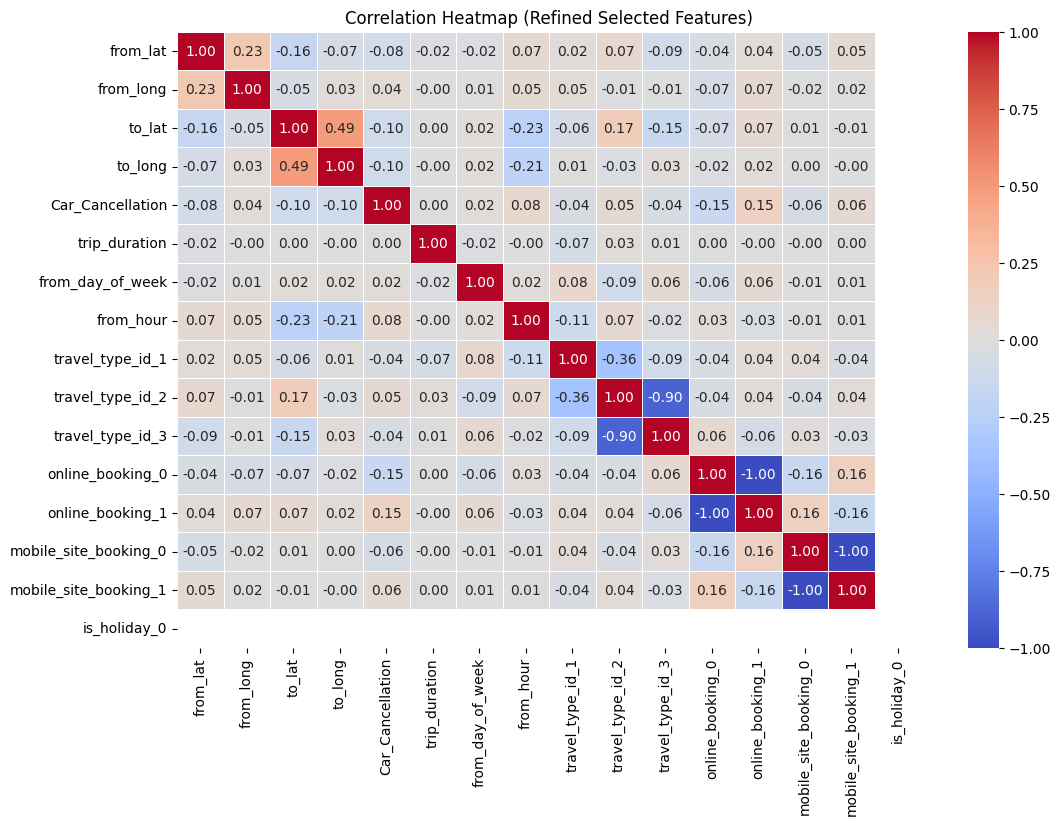

In [ ]:
selected_features = [
    "from_lat",
    "from_long",
    "to_lat",
    "to_long",
    "Car_Cancellation",
    "trip_duration",
    "from_day_of_week",
    "from_hour",
    "travel_type_id_1",
    "travel_type_id_2",
    "travel_type_id_3",
    "online_booking_0",
    "online_booking_1",
    "mobile_site_booking_0",
    "mobile_site_booking_1",
    "is_holiday_0",
]

# Compute the correlation matrix for selected features
corr_matrix_selected = df_final[selected_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix_selected, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5
)
plt.title("Correlation Heatmap (Refined Selected Features)")
plt.show()

# Splitting the dataset into Training and Test Set

In [ ]:

# Define features (X) and target variable (y)
X = df_final.drop(columns=["Car_Cancellation"])  # Features
y = df_final["Car_Cancellation"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirming the split
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (8000, 15), Testing Set: (2000, 15)


# Building the Neural Network Model

In [ ]:
# Defining the neural network model
model = Sequential(
    [
        Dense(
            32, activation="relu", input_shape=(X_train.shape[1],)
        ),  # Input layer + Hidden Layer 1
        Dense(16, activation="relu"),  # Hidden Layer 2
        Dense(1, activation="sigmoid"),  # Output Layer (Binary Classification)
    ]
)

# Compiling the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

# Display model architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [ ]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=40,
    batch_size=32,
    verbose=1,
)


Epoch 1/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.9084 - loss: 0.3346 - val_accuracy: 0.9255 - val_loss: 0.2367
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.9271 - loss: 0.2295 - val_accuracy: 0.9255 - val_loss: 0.2352
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.9242 - loss: 0.2348 - val_accuracy: 0.9265 - val_loss: 0.2370
Epoch 4/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.9220 - loss: 0.2354 - val_accuracy: 0.9255 - val_loss: 0.2337
Epoch 5/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.9278 - loss: 0.2260 - val_accuracy: 0.9265 - val_loss: 0.2343
Epoch 6/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.9283 - loss: 0.2209 - val_accuracy: 0.9255 - val_loss: 0.2323
Epoch 7/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.9237 - loss: 0.2312 - val_accuracy: 0.9255 - val_loss: 0.2316
Epoch 8/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.9201 - loss: 0.2367 - 

# Evaluating the Model

In [106]:
# Predict on test set
y_pred = (model.predict(X_test) > 0.3).astype("int32")

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
Accuracy: 0.9155
Precision: 0.3529
Recall: 0.1611
F1 Score: 0.2212


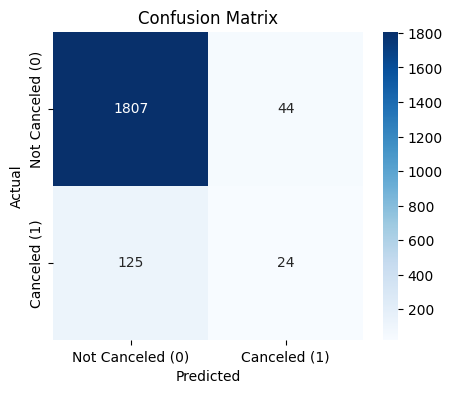

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Canceled (0)", "Canceled (1)"],
    yticklabels=["Not Canceled (0)", "Canceled (1)"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Training vs. Validation Accuracy

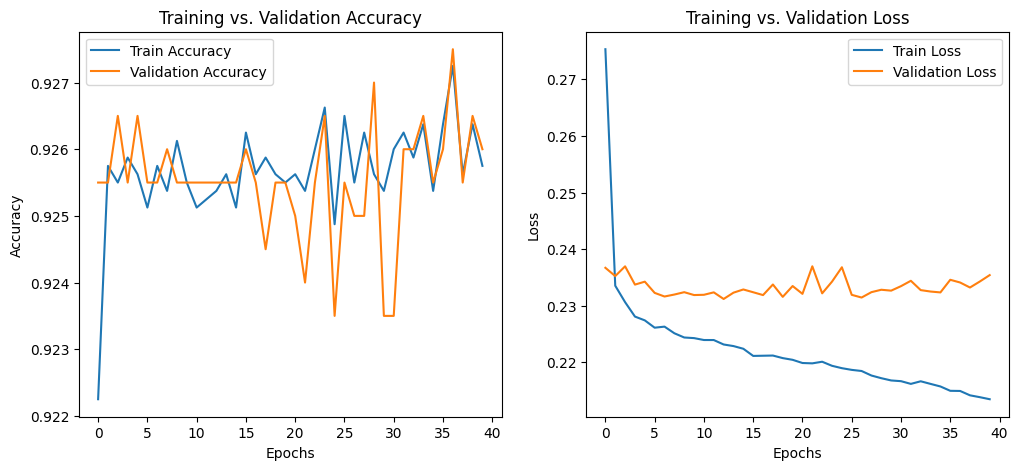

In [ ]:
# Plot training & validation accuracy & loss over epochs
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy Plot
axes[0].plot(history.history["accuracy"], label="Train Accuracy")
axes[0].plot(history.history["val_accuracy"], label="Validation Accuracy")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Training vs. Validation Accuracy")
axes[0].legend()

# Loss Plot
axes[1].plot(history.history["loss"], label="Train Loss")
axes[1].plot(history.history["val_loss"], label="Validation Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].set_title("Training vs. Validation Loss")
axes[1].legend()

plt.show()

In [ ]:
# Extract weights from first hidden layer
weights = model.layers[0].get_weights()[0]

# Compute mean absolute weight per feature
feature_importance = np.mean(np.abs(weights), axis=1)

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": feature_importance}
)
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

# Display the weakest predictors (bottom 5)
print("\nWeakest Predictors (Lowest Importance):")
print(feature_importance_df.tail(5))



Weakest Predictors (Lowest Importance):
                  Feature  Importance
4           trip_duration    0.201768
14           is_holiday_0    0.198104
1               from_long    0.195394
12  mobile_site_booking_0    0.188746
5        from_day_of_week    0.187203


# Generate Lift Curve for Ranking Performance

PermutationExplainer explainer: 2001it [00:44, 36.76it/s]                       


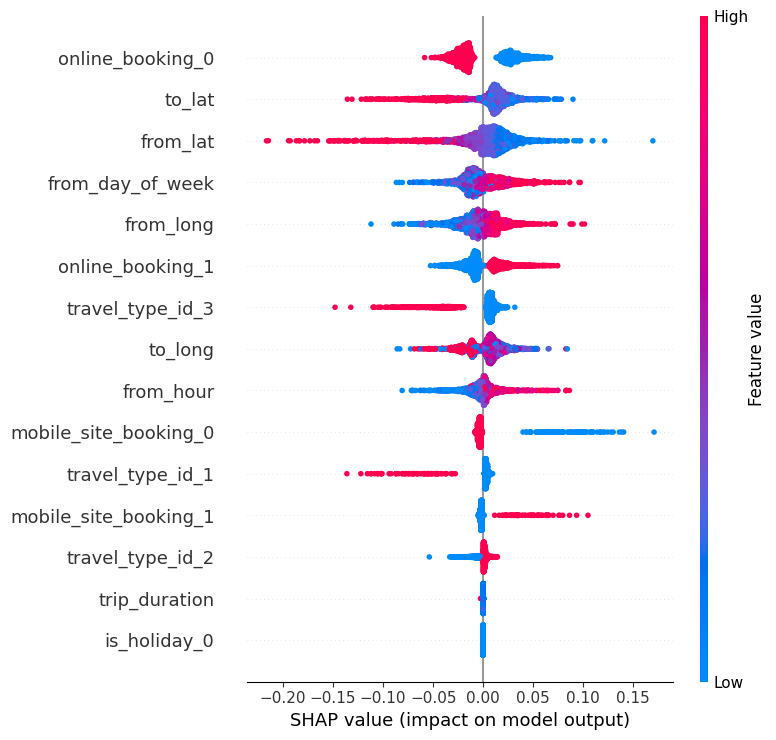

In [ ]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot SHAP values to see important features
shap.summary_plot(shap_values, X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step


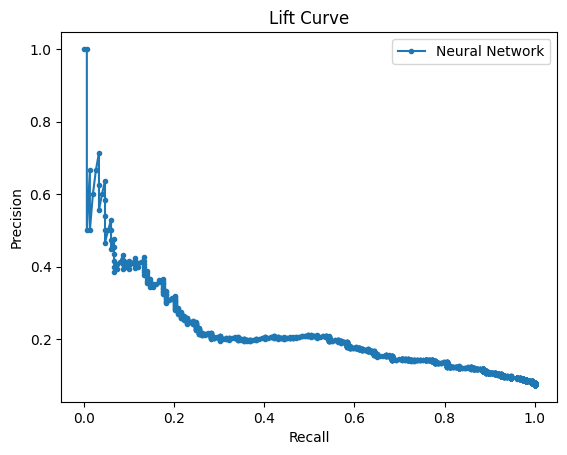

In [ ]:
y_scores = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(recalls, precisions, marker=".", label="Neural Network")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Lift Curve")
plt.legend()
plt.show()

In [115]:
# Compute Area Under Precision-Recall Curve (PR AUC)
pr_auc = auc(recalls, precisions)

print(f"Precision-Recall AUC (Lift Performance): {pr_auc:.4f}")

Precision-Recall AUC (Lift Performance): 0.2269


In [117]:
df_final.to_csv("processed_data.csv", index=False)